In [44]:
import pandas as pd
from pandas import DataFrame
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
import glob
import seaborn as sns
import shutil
import networkx as nx

# import my custom functions
sys.path.insert(0, '/home/jmunson-mcgee/')
from JMM_functions import *

pd.set_option("display.max_rows", 6)

outdir='/mnt/scgc/simon/microg2p/analyses/JdF_analysis/analysis/CRYO_analysis/'
safe_make_dir(outdir)

indir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/CRYO_analysis/'
os.chdir(indir)

images='/mnt/scgc/simon/microg2p/analyses/JdF_analysis/images/CRYO_analysis/'
safe_make_dir(images)
    
matplotlib.__version__

Folder already exists
Folder already exists


'3.1.0'

In [45]:
cryo_data=pd.read_csv('tbls/data_for_heatmap_analysis.csv', index_col=0)
cryo_data

,name,GTDB_classification,Predicted_respiration_rate_fmol_O2perhr,FACS_date,Plate,GTDBtk_classification,Freeze_duration
0,AH-545-A01,HIMB59,0.004897,181030.0,AH-545,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Fresh
1,AH-545-A02,UBA5951,0.045645,181030.0,AH-545,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Fresh
2,AH-545-A03,Unclassified,0.014962,181030.0,AH-545,Unclassified,Fresh
...,...,...,...,...,...,...,...
1677,AM-586-P21,MGIIb-O3,0.005450,NaN,AM-586,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,1230 days
1678,AM-586-P22,UBA9410,0.013970,NaN,AM-586,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,1230 days
1679,AM-586-P23,Pelagibacter,0.004150,NaN,AM-586,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1230 days


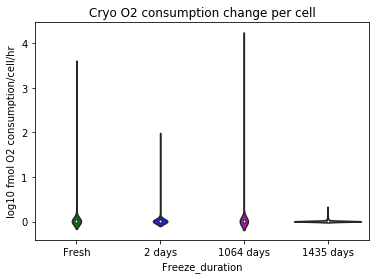

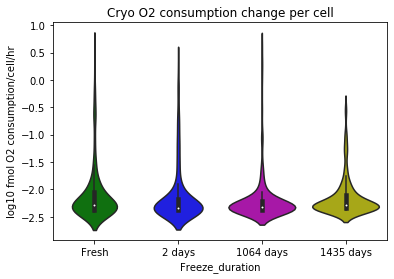

In [46]:


my_pal = {'Fresh': "g", '2 days': "b", '1064 days':"m", '84 days':'r', '1230 days':'c', '1435 days':'y'}

cryo_data['O2_consumption_log10']=np.log10(cryo_data['Predicted_respiration_rate_fmol_O2perhr'])

GoM_data=cryo_data[cryo_data['Plate'].isin(['AH-545', 'AH-580', 'AM-379', 'AM-582'])]


sns.violinplot(x='Freeze_duration', y='Predicted_respiration_rate_fmol_O2perhr', data=GoM_data, palette=my_pal)
plt.title('Cryo O2 consumption change per cell')
plt.ylabel('log10 fmol O2 consumption/cell/hr')
plt.savefig(os.path.join(images,"GoM_Cryo_violinplot.pdf"))
plt.show()


sns.violinplot(x='Freeze_duration', y='O2_consumption_log10', data=GoM_data, palette=my_pal)
plt.title('Cryo O2 consumption change per cell')
plt.ylabel('log10 fmol O2 consumption/cell/hr')
plt.savefig(os.path.join(images,"GoM_log10_Cryo_violinplot.pdf"))



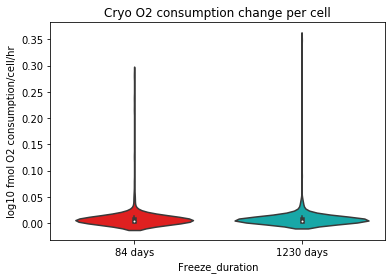

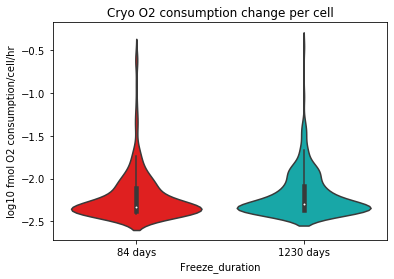

In [47]:
JdF_data=cryo_data[cryo_data['Plate'].isin(['AH-770', 'AM-586'])]


sns.violinplot(x='Freeze_duration', y='Predicted_respiration_rate_fmol_O2perhr', data=JdF_data, palette=my_pal)
plt.title('Cryo O2 consumption change per cell')
plt.ylabel('log10 fmol O2 consumption/cell/hr')
plt.savefig(os.path.join(images,"JdF_Cryo_violinplot.pdf"))
plt.show()


sns.violinplot(x='Freeze_duration', y='O2_consumption_log10', data=JdF_data, palette=my_pal)
plt.title('Cryo O2 consumption change per cell')
plt.ylabel('log10 fmol O2 consumption/cell/hr')
plt.savefig(os.path.join(images,"JdF_log10_Cryo_violinplot.pdf"))

In [48]:
from itertools import combinations
from scipy import stats

final_df=pd.DataFrame(columns=['Plate1', 'Plate2', 'tstat', 'pvalue'])

tdf1=cryo_data.loc[cryo_data['Plate']=='AH-545', 'Predicted_respiration_rate_fmol_O2perhr']

tdf2=cryo_data.loc[cryo_data['Plate']=='AH-580', 'Predicted_respiration_rate_fmol_O2perhr']
tdf3=cryo_data.loc[cryo_data['Plate']=='AM-379', 'Predicted_respiration_rate_fmol_O2perhr']
tdf4=cryo_data.loc[cryo_data['Plate']=='AM-582', 'Predicted_respiration_rate_fmol_O2perhr']
   
results=stats.ttest_ind(tdf1, tdf2)
print(results)
df2=pd.DataFrame({'duration':'2 days', 'Plate1': 'Fresh', 'Plate2': '2 days', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':1}, index=[0])

results=stats.ttest_ind(tdf1, tdf3)
print(results)
df3=pd.DataFrame({'duration':'1064 days', 'Plate1': 'Fresh', 'Plate2': '1064 days', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':1}, index=[0])

results=stats.ttest_ind(tdf1, tdf4)
print(results)
df4=pd.DataFrame({'duration':'1453 days', 'Plate1': 'Fresh', 'Plate2': '1453 days', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':1}, index=[0])

final_df = pd.concat([df2, df3, df4], ignore_index = True)
final_df

Ttest_indResult(statistic=0.571124947986495, pvalue=0.5681695209165267)
Ttest_indResult(statistic=0.22358344413176168, pvalue=0.8231660045784417)
Ttest_indResult(statistic=2.257052459255759, pvalue=0.024383230578177637)


,duration,Plate1,Plate2,tstat,pvalue,depth
0,2 days,Fresh,2 days,0.571125,0.568170,1
1,1064 days,Fresh,1064 days,0.223583,0.823166,1
2,1453 days,Fresh,1453 days,2.257052,0.024383,1


In [49]:
from itertools import combinations
from scipy import stats

final_df=pd.DataFrame(columns=['Plate1', 'Plate2', 'tstat', 'pvalue'])

tdf1=cryo_data.loc[cryo_data['Plate']=='AH-770', 'Predicted_respiration_rate_fmol_O2perhr']

tdf2=cryo_data.loc[cryo_data['Plate']=='AM-586', 'Predicted_respiration_rate_fmol_O2perhr']
   
results=stats.ttest_ind(tdf1, tdf2)
print(results)
df2=pd.DataFrame({'duration':'1146 Days', 'Plate1': '84', 'Plate2': '1230', 'tstat':results.statistic, 'pvalue': results.pvalue, 'depth':1}, index=[0])

df2

Ttest_indResult(statistic=0.4730617632360235, pvalue=0.6363480191464473)


,duration,Plate1,Plate2,tstat,pvalue,depth
0,1146 Days,84,1230,0.473062,0.636348,1


In [50]:
# Now add a chi-squared test on the distribution of GoM samples
from scipy.stats import chi2_contingency

storage=['2 days', '1064 days', '1435 days']

fresh=cryo_data[cryo_data['Freeze_duration']=='Fresh']

for i in storage:
    tdf=cryo_data[cryo_data['Freeze_duration']==i]
    df=pd.concat([fresh, tdf])
    
    contigency=pd.crosstab(df['GTDB_classification'], df['Freeze_duration'])
    c, p, dof, expected = chi2_contingency(contigency)
    print('the chi square test p value for Fresh (expected) and', i, '(observed) is:',p)
    
    threshold=3
    t_contigency=contigency[contigency.gt(threshold).any(axis=1)]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in EITHER Fresh (expected) OR', i, '(observed) is:',p)

    threshold=1
    t_contigency=contigency[contigency[i]>=threshold]
    t_contigency=t_contigency[t_contigency['Fresh']>=threshold]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in both Fresh (expected) and', i, '(observed) is:',p)
    print()
t_contigency

the chi square test p value for Fresh (expected) and 2 days (observed) is: 0.015604838147265628
the chi square test p value for genera with at least 3 cells in EITHER Fresh (expected) OR 2 days (observed) is: 0.001355169094466983
the chi square test p value for genera with at least 1 cells in both Fresh (expected) and 2 days (observed) is: 0.7312159919292023

the chi square test p value for Fresh (expected) and 1064 days (observed) is: 0.002422885276404041
the chi square test p value for genera with at least 3 cells in EITHER Fresh (expected) OR 1064 days (observed) is: 3.293191474239318e-06
the chi square test p value for genera with at least 1 cells in both Fresh (expected) and 1064 days (observed) is: 0.982052101389858

the chi square test p value for Fresh (expected) and 1435 days (observed) is: 1.2787058002212262e-06
the chi square test p value for genera with at least 3 cells in EITHER Fresh (expected) OR 1435 days (observed) is: 1.044923696080358e-10
the chi square test p value 

Freeze_duration,1435 days,Fresh
GTDB_classification,,
AAA536-G10,5,3
AG-337-I02,1,4
Amylibacter,6,4
...,...,...
UBA7428,1,4
UBA868,1,2
Unclassified,38,44


In [51]:
# Now add a chi-squared test on the distribution of JdF samples
from scipy.stats import chi2_contingency

storage=['1230 days']

fresh=cryo_data[cryo_data['Freeze_duration']=='84 days']

for i in storage:
    tdf=cryo_data[cryo_data['Freeze_duration']==i]
    df=pd.concat([fresh, tdf])
    
    contigency=pd.crosstab(df['GTDB_classification'], df['Freeze_duration'])
    c, p, dof, expected = chi2_contingency(contigency)
    print('the chi square test p value for JdF samples stored for 84 days cryo (expected) and', i, '(observed) is:',p)
    print(len(contigency))
    
    threshold=3
    t_contigency=contigency[contigency.gt(threshold).any(axis=1)]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in EITHER 84 days cryo (expected) OR', i, '(observed) is:',p)
    print(len(t_contigency))

    threshold=1
    t_contigency=contigency[contigency[i]>=threshold]
    t_contigency=t_contigency[t_contigency['84 days']>=threshold]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in both 84 days cryo (expected) and', i, '(observed) is:',p)
    print(len(t_contigency))
    print()
t_contigency

the chi square test p value for JdF samples stored for 84 days cryo (expected) and 1230 days (observed) is: 0.22335151010126644
77
the chi square test p value for genera with at least 3 cells in EITHER 84 days cryo (expected) OR 1230 days (observed) is: 0.008510941344685023
13
the chi square test p value for genera with at least 1 cells in both 84 days cryo (expected) and 1230 days (observed) is: 0.5267354728344094
35



Freeze_duration,1230 days,84 days
GTDB_classification,,
AAA240-E13,1,2
AG-414-E02,10,11
Arctic96AD-7,20,13
...,...,...
UBA9145,1,1
UBA9410,6,4
Unclassified,51,98


### And now repeat the chi-square analysis with the unclassified cells removed from the analysis.

In [52]:
cryo_data=cryo_data[cryo_data['GTDB_classification']!= 'Unclassified']

# Now add a chi-squared test on the distribution of GoM samples
from scipy.stats import chi2_contingency

storage=['2 days', '1064 days', '1435 days']

fresh=cryo_data[cryo_data['Freeze_duration']=='Fresh']

for i in storage:
    tdf=cryo_data[cryo_data['Freeze_duration']==i]
    df=pd.concat([fresh, tdf])
    
    contigency=pd.crosstab(df['GTDB_classification'], df['Freeze_duration'])
    c, p, dof, expected = chi2_contingency(contigency)
    print('the chi square test p value for Fresh (expected) and', i, '(observed) is:',p)
    
    threshold=3
    t_contigency=contigency[contigency.gt(threshold).any(axis=1)]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in EITHER Fresh (expected) OR', i, '(observed) is:',p)

    threshold=1
    t_contigency=contigency[contigency[i]>=threshold]
    t_contigency=t_contigency[t_contigency['Fresh']>=threshold]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in both Fresh (expected) and', i, '(observed) is:',p)
    print()
t_contigency

the chi square test p value for Fresh (expected) and 2 days (observed) is: 0.024673677078372633
the chi square test p value for genera with at least 3 cells in EITHER Fresh (expected) OR 2 days (observed) is: 0.002960942279933713
the chi square test p value for genera with at least 1 cells in both Fresh (expected) and 2 days (observed) is: 0.8790289342033777

the chi square test p value for Fresh (expected) and 1064 days (observed) is: 0.0031245907348950628
the chi square test p value for genera with at least 3 cells in EITHER Fresh (expected) OR 1064 days (observed) is: 2.881302610204714e-06
the chi square test p value for genera with at least 1 cells in both Fresh (expected) and 1064 days (observed) is: 0.9808024841491454

the chi square test p value for Fresh (expected) and 1435 days (observed) is: 1.3670485398468515e-06
the chi square test p value for genera with at least 3 cells in EITHER Fresh (expected) OR 1435 days (observed) is: 7.547579317254582e-11
the chi square test p valu

Freeze_duration,1435 days,Fresh
GTDB_classification,,
AAA536-G10,5,3
AG-337-I02,1,4
Amylibacter,6,4
...,...,...
UBA10364,1,2
UBA7428,1,4
UBA868,1,2


In [53]:
# Now add a chi-squared test on the distribution of JdF samples
from scipy.stats import chi2_contingency

storage=['1230 days']

fresh=cryo_data[cryo_data['Freeze_duration']=='84 days']

for i in storage:
    tdf=cryo_data[cryo_data['Freeze_duration']==i]
    df=pd.concat([fresh, tdf])
    
    contigency=pd.crosstab(df['GTDB_classification'], df['Freeze_duration'])
    c, p, dof, expected = chi2_contingency(contigency)
    print('the chi square test p value for JdF samples stored for 84 days cryo (expected) and', i, '(observed) is:',p)
    print(len(contigency))
    
    threshold=3
    t_contigency=contigency[contigency.gt(threshold).any(axis=1)]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in EITHER 84 days cryo (expected) OR', i, '(observed) is:',p)
    print(len(t_contigency))

    threshold=1
    t_contigency=contigency[contigency[i]>=threshold]
    t_contigency=t_contigency[t_contigency['84 days']>=threshold]
    c, p, dof, expected = chi2_contingency(t_contigency)
    print('the chi square test p value for genera with at least', threshold, 'cells in both 84 days cryo (expected) and', i, '(observed) is:',p)
    print(len(t_contigency))
    print()
t_contigency

the chi square test p value for JdF samples stored for 84 days cryo (expected) and 1230 days (observed) is: 0.6972168407004967
76
the chi square test p value for genera with at least 3 cells in EITHER 84 days cryo (expected) OR 1230 days (observed) is: 0.5113115217642429
12
the chi square test p value for genera with at least 1 cells in both 84 days cryo (expected) and 1230 days (observed) is: 0.9937504208516696
34



Freeze_duration,1230 days,84 days
GTDB_classification,,
AAA240-E13,1,2
AG-414-E02,10,11
Arctic96AD-7,20,13
...,...,...
UBA8106,1,1
UBA9145,1,1
UBA9410,6,4


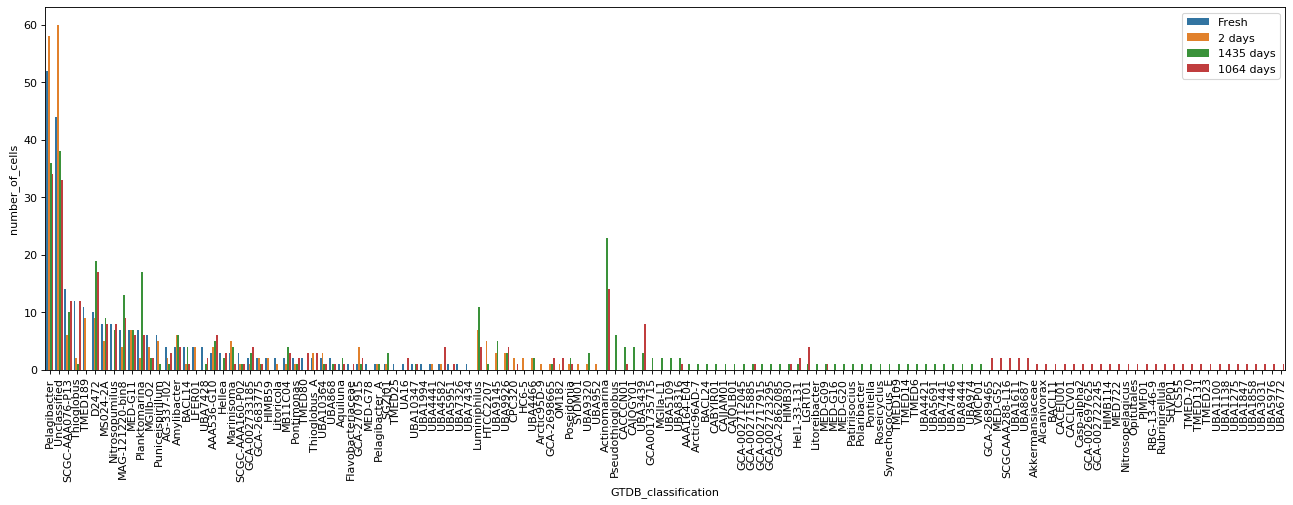

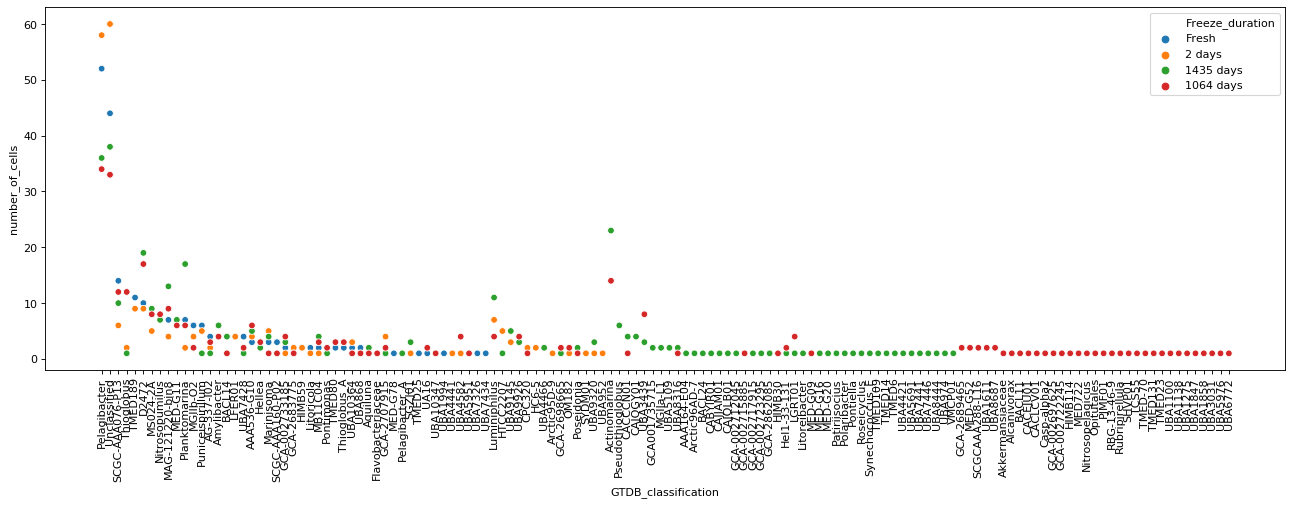

In [54]:
# Make a genus distribution chart.
from matplotlib.pyplot import figure

grouped=GoM_data.groupby(['GTDB_classification', 'Freeze_duration'], as_index=False)['name'].count()
grouped=grouped.rename(columns={'name':'number_of_cells'})
grouped=grouped.sort_values(['Freeze_duration', 'number_of_cells'], ascending = [False, False])

grouped



figure(figsize=(20, 6), dpi=80)
sns.barplot(x='GTDB_classification', y='number_of_cells', data=grouped, hue='Freeze_duration')
plt.legend(loc='upper right')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.savefig(os.path.join(images, 'GoM_Cells_per_genus_barchart_cryopreservation.pdf'))
plt.show()

figure(figsize=(20, 6), dpi=80)
sns.scatterplot(x='GTDB_classification', y='number_of_cells', data=grouped, hue='Freeze_duration')
plt.legend(loc='upper right')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.savefig(os.path.join(images, 'GoM_Cells_per_genus_dotchart_cryopreservation.pdf'))


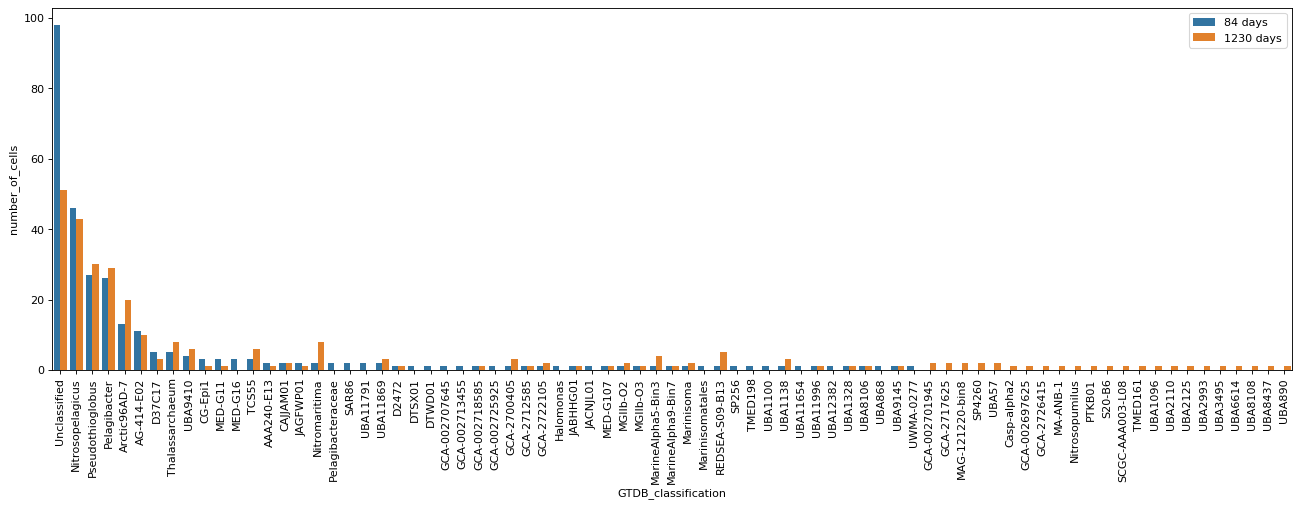

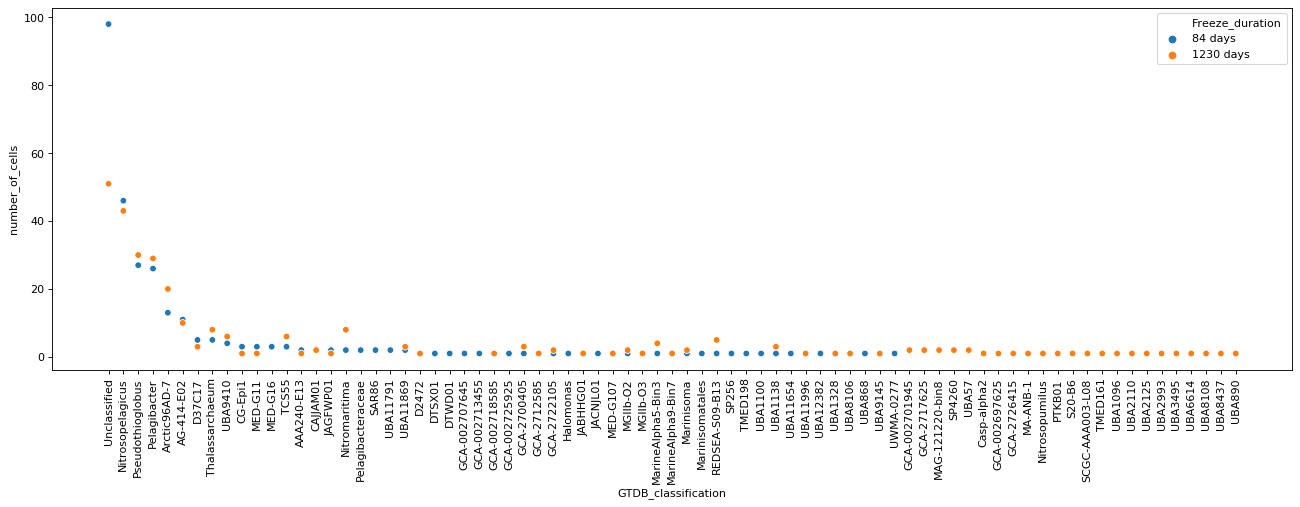

In [55]:
# Make a genus distribution chart.
from matplotlib.pyplot import figure

grouped=JdF_data.groupby(['GTDB_classification', 'Freeze_duration'], as_index=False)['name'].count()
grouped=grouped.rename(columns={'name':'number_of_cells'})
grouped=grouped.sort_values(['Freeze_duration', 'number_of_cells'], ascending = [False, False])

grouped



figure(figsize=(20, 6), dpi=80)
sns.barplot(x='GTDB_classification', y='number_of_cells', data=grouped, hue='Freeze_duration')
plt.legend(loc='upper right')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.savefig(os.path.join(images, 'JdF_Cells_per_genus_barchart_cryopreservation.pdf'))
plt.show()

figure(figsize=(20, 6), dpi=80)
sns.scatterplot(x='GTDB_classification', y='number_of_cells', data=grouped, hue='Freeze_duration')
plt.legend(loc='upper right')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.savefig(os.path.join(images, 'JdF_Cells_per_genus_dotchart_cryopreservation.pdf'))